# Linear Regression 

This notebook contains the two types of implementations of linear regression from scratch and from the sklearn library

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
# Load in the test and train housing data
train_data = pd.read_csv("data/housing_train.csv")
test_data = pd.read_csv("data/housing_test.csv")

In [4]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [6]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [7]:
train_data = train_data.drop("ocean_proximity", axis=1)
test_data = test_data.drop("ocean_proximity", axis=1)

In [8]:
# Check for missing values
train_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [9]:
test_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
test_data["total_bedrooms"] = test_data['total_bedrooms'].fillna(test_data.total_bedrooms.mean())

<Axes: >

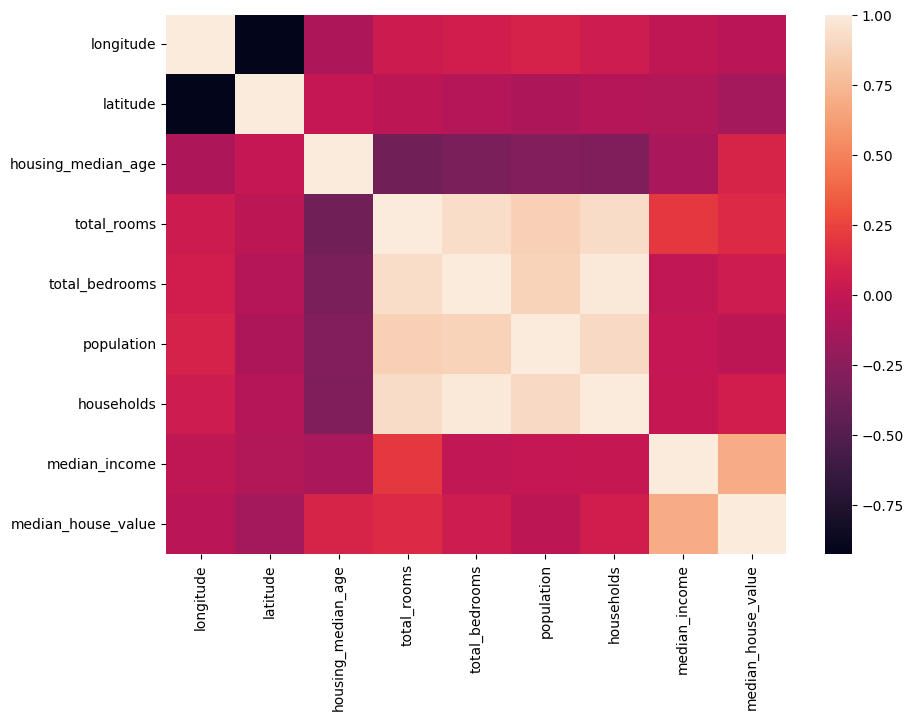

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(train_data.corr())

In [20]:
# split the data into features and labels
X_train, y_train = train_data.drop("median_house_value", axis=1), train_data["median_house_value"]
X_test, y_test = test_data.drop("median_house_value", axis=1), test_data["median_house_value"]

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

## Modelling part

### 1. From Scratch

In [21]:
X_train_temp = np.c_[np.ones(len(X_train)), X_train]
X_train_temp

array([[ 1.0000e+00, -1.1703e+02,  3.2710e+01, ...,  2.3000e+03,
         6.2300e+02,  3.2596e+00],
       [ 1.0000e+00, -1.1816e+02,  3.3770e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8125e+00],
       [ 1.0000e+00, -1.2048e+02,  3.4660e+01, ...,  9.1500e+02,
         3.3600e+02,  4.1563e+00],
       ...,
       [ 1.0000e+00, -1.1838e+02,  3.4030e+01, ...,  1.7560e+03,
         5.2700e+02,  2.9344e+00],
       [ 1.0000e+00, -1.2196e+02,  3.7580e+01, ...,  1.7770e+03,
         5.5900e+02,  5.7192e+00],
       [ 1.0000e+00, -1.2242e+02,  3.7770e+01, ...,  2.6190e+03,
         1.2420e+03,  2.5755e+00]], shape=(16512, 9))

In [22]:
# normal form 
lin_reg = np.linalg.inv(X_train_temp.T @ X_train_temp) @ X_train_temp.T @ y_train

lin_reg = np.array(lin_reg)

lin_reg

array([-3.57822423e+06, -4.26323917e+04, -4.24500719e+04,  1.18280965e+03,
       -8.18797708e+00,  1.16260128e+02, -3.84922131e+01,  4.63425720e+01,
        4.05384044e+04])

In [23]:
preds = np.dot(X_test,  lin_reg[1:])
preds = preds + lin_reg[0]

In [24]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mean_absolute_error(y_test, preds)

np.float64(51834.02627352159)

### 2. Sklearn module

In [25]:
lin_regression = LinearRegression()

lin_regression.fit(X_train, y_train)

preds = lin_regression.predict(X_test)

mean_absolute_error(y_test, preds)

np.float64(51834.02627354077)

So both errors are equal, we have succcessfully implemented linear regression from scratch

### Visualize the predictions

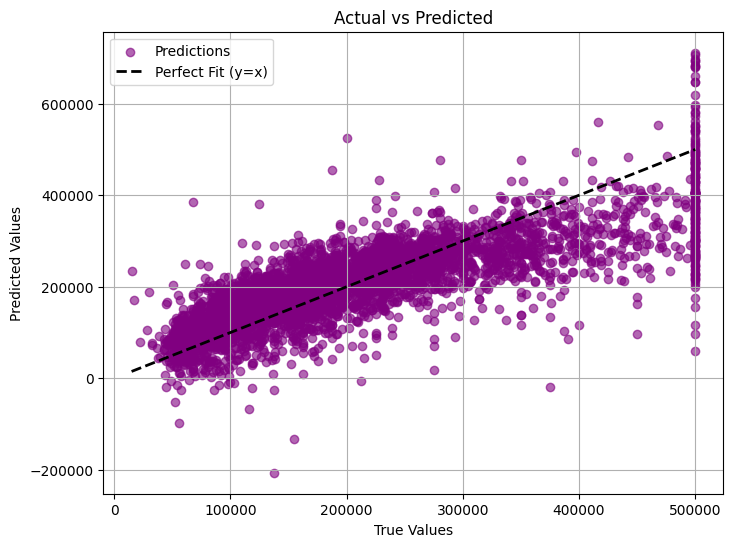

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color="purple", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit (y=x)")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


if our model is perfect, all points will lie on the line `x = y`

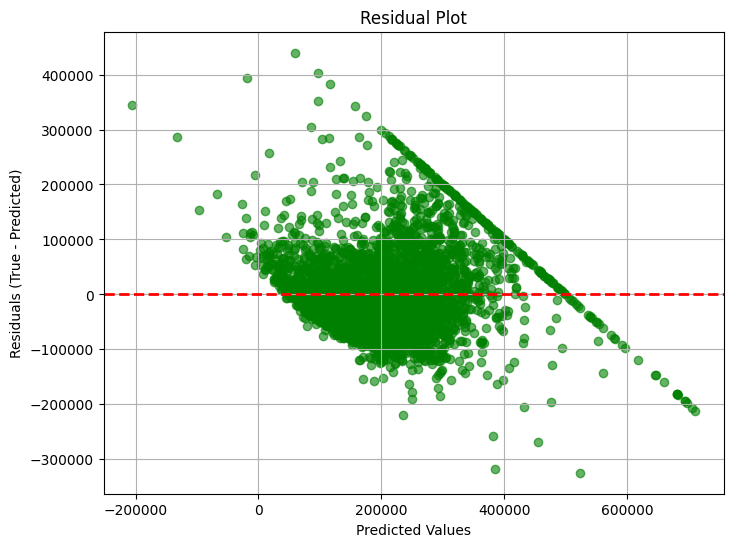

In [31]:
residuals = y_test - preds

plt.figure(figsize=(8, 6))
plt.scatter(preds, residuals, color="green", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


For a good model, the residuals should scatter randomly around zero 